#### Business Analytics FHDW 2025
## Übung

1. Untersuchen Sie den Gebrauchtwagen-Datensatz auf redundante Variablen. Wenn Sie Variablen entfernen, versuchen Sie das sowohl aus dem Domänenkontext, als auch abstrakt anhand der Zahlen zu begründen.

2. Führen Sie mit dem reduzierten Datensatz eine Regression zur Vorhersage des Preises durch. Vergleichen Sie die Performance Ihres reduzierten Modells mit der des Modells mit dem vollen Umfang.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import math

def regressionSummary(y_true, y_predicted):
    y_true = np.asarray(y_true)
    y_predicted = np.asarray(y_predicted)
    y_residuals = y_true - y_predicted
    metrics = [
        ('Summe Abweichungen', sum(y_residuals)),
        ('Summe absolute Abweichungen', sum(abs(y_residuals))),
        ('Mittlerer Fehler', sum(y_residuals) / len(y_residuals)),
        ('Mittlerer absoluter Fehler', sum(abs(y_residuals)) / len(y_residuals)),
        ('Wurzel des durchschnittlichen Fehlerquadrats', math.sqrt(mean_squared_error(y_true, y_predicted)))
    ]
    if all(yt != 0 for yt in y_true):
        metrics.extend([
            ('Mittlerer prozentualer Fehler', 100 * sum(y_residuals / y_true) / len(y_residuals)),
            ('Mittlerer absoluter prozentualer Fehler', 100 * sum(abs(y_residuals / y_true) / len(y_residuals))),
        ])
    maxlength = max(len(m[0]) for m in metrics)
    fmt1 = f'{{:>{maxlength}}} : {{:.4f}}'
    print('\nRegressionskennzahlen\n')
    for metric, value in metrics:
        print(fmt1.format(metric, value))

car_df = pd.read_csv('Daten/ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]

predictors = ['age_08_04', 
              'km', 
              'fuel_type', 
              'hp', 
              'met_color', 
              'automatic', 
              'cc', 
              'doors', 
              'quarterly_tax', 
              'weight']
outcome = 'price'        

X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]

X

,age_08_04,km,hp,met_color,automatic,cc,doors,quarterly_tax,weight,fuel_type_Diesel,fuel_type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,True,False
1,23,72937,90,1,0,2000,3,210,1165,True,False
2,24,41711,90,1,0,2000,3,210,1165,True,False
3,26,48000,90,0,0,2000,3,210,1165,True,False
4,30,38500,90,0,0,2000,3,210,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
995,68,42750,110,1,0,1600,3,69,1050,False,True
996,67,42102,110,1,0,1600,5,85,1075,False,True
997,63,41586,110,1,0,1600,5,19,1114,False,True
998,64,41200,110,0,0,1600,5,85,1070,False,True


<Axes: >

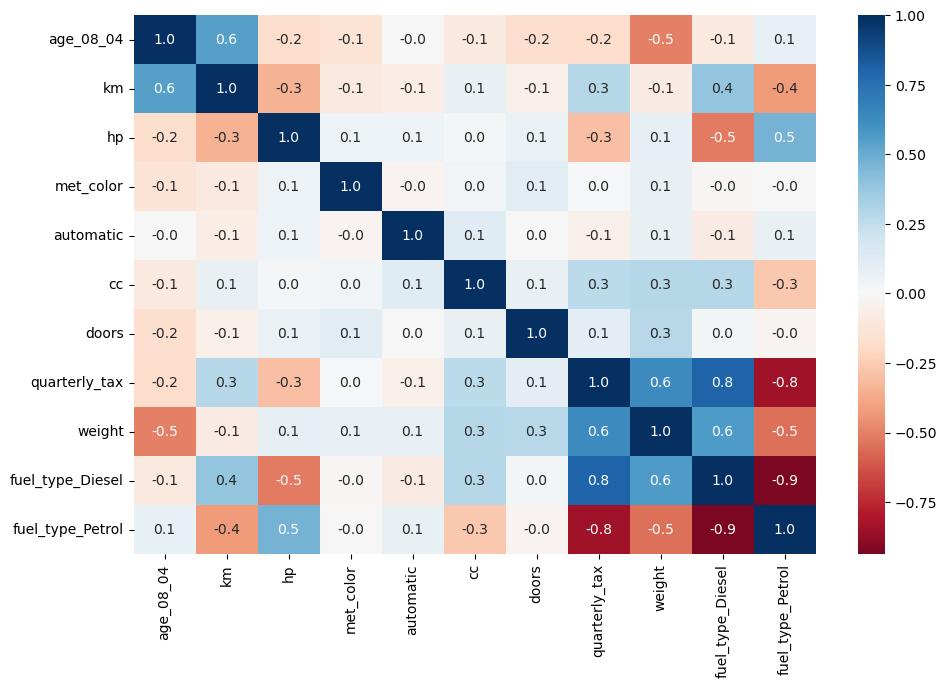

In [2]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(X.corr(), annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

Die beiden Kraftstoffarten korrelieren sehr stark. Gleichzeitig sind beide stark abhängig von der Steuer und dem Gewicht. Nehmen wir die Kraftstoffarten also raus, da ihre Informationen hinreichend in Steuer und Gewicht enthalten sind.

In [3]:
#X_reduced = X[X.columns.difference(["fuel_type_Diesel", "fuel_type_Petrol", "quarterly_tax"])]
print(X.columns.difference(["fuel_type_Diesel", "fuel_type_Petrol"]))
X_reduced = X[X.columns.difference(["fuel_type_Diesel", "fuel_type_Petrol"])]
X_reduced

Index(['age_08_04', 'automatic', 'cc', 'doors', 'hp', 'km', 'met_color',
       'quarterly_tax', 'weight'],
      dtype='object')


,age_08_04,automatic,cc,doors,hp,km,met_color,quarterly_tax,weight
0,23,0,2000,3,90,46986,1,210,1165
1,23,0,2000,3,90,72937,1,210,1165
2,24,0,2000,3,90,41711,1,210,1165
3,26,0,2000,3,90,48000,0,210,1165
4,30,0,2000,3,90,38500,0,210,1170
...,...,...,...,...,...,...,...,...,...
995,68,0,1600,3,110,42750,1,69,1050
996,67,0,1600,5,110,42102,1,85,1075
997,63,0,1600,5,110,41586,1,19,1114
998,64,0,1600,5,110,41200,0,85,1070


Qualität der Anpassung an Trainingsdaten:

In [4]:
train_X_reduced, valid_X_reduced, train_y, valid_y = train_test_split(X_reduced, y, test_size=0.4, random_state=1)
car_lr_reduced = LinearRegression()
car_lr_reduced.fit(train_X_reduced, train_y)

print(pd.DataFrame({'Prediktor': X_reduced.columns, 'Koeffizient': car_lr_reduced.coef_}))
regressionSummary(train_y, car_lr_reduced.predict(train_X_reduced))

       Prediktor  Koeffizient
0      age_08_04  -140.024285
1      automatic   437.920023
2             cc     0.005057
3          doors   -22.436326
4             hp    41.095039
5             km    -0.020691
6      met_color    55.563729
7  quarterly_tax     6.942553
8         weight    11.854104

Regressionskennzahlen

                          Summe Abweichungen : -0.0000
                 Summe absolute Abweichungen : 642056.8825
                            Mittlerer Fehler : -0.0000
                  Mittlerer absoluter Fehler : 1070.0948
Wurzel des durchschnittlichen Fehlerquadrats : 1426.6036
               Mittlerer prozentualer Fehler : -1.0984
     Mittlerer absoluter prozentualer Fehler : 9.5823


Qualität der Vorhersage auf Basis des reduzierten Modells:

In [5]:
car_lr_reduced_prediction = car_lr_reduced.predict(valid_X_reduced)
#print(car_lr_reduced_prediction)
residuals = valid_y - car_lr_reduced_prediction
result = pd.DataFrame({'Vorhersage': car_lr_reduced_prediction, 'Tatsächlich': valid_y, 'Residuum': residuals})
print(result.head(20))
regressionSummary(valid_y, car_lr_reduced_prediction)

       Vorhersage  Tatsächlich     Residuum
507  10491.985667        11500  1008.014333
818   9316.844154         8950  -366.844154
452  10532.165827        11450   917.834173
368  13772.056410        11450 -2322.056410
242  12393.629507        11950  -443.629507
929   9450.960971         9995   544.039029
262  12571.416897        13500   928.583103
810   8750.357493         7950  -800.357493
318  12201.574520         9900 -2301.574520
49   19254.452092        21950  2695.547908
446  10854.315678        11950  1095.684322
142  18430.620265        19950  1519.379735
968   9919.704005         9950    30.295995
345  13832.414161        14950  1117.585839
971   7964.801336        10495  2530.198664
133  17534.144170        15950 -1584.144170
104  19734.508676        19450  -284.508676
6    16412.040883        16900   487.959117
600  13774.864723        11250 -2524.864723
496  11214.395049        11750   535.604951

Regressionskennzahlen

                          Summe Abweichungen : 53116